In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('Covid Live.csv')

print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [3]:
df.columns = df.columns.str.replace('\n', ' ').str.strip()

#There's an issue with the column names, so I'm cleaning them

print("First few rows of the dataset with cleaned column names:")
display(df.head())

#Now I'm going to check for null values and the columns that have them

print("Columns with null values:")
display(df.isnull().sum())

First few rows of the dataset with cleaned column names:


,#,"Country, Other",Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


Columns with null values:


#                      0
Country, Other         0
Total Cases            0
Total Deaths           5
New Deaths           227
Total Recovered       16
Active Cases          15
Serious, Critical     83
Tot Cases/ 1M pop      2
Deaths/ 1M pop         7
Total Tests           16
Tests/ 1M pop         16
Population             2
dtype: int64

In [4]:
#Need to clean the data further

#Let's check how many null values there are specifically in New Deaths vs Nonnull

print("Number of null values in New Deaths:")
display(df['New Deaths'].isnull().sum())

print("Number of nonnull values in New Deaths:")
display(df['New Deaths'].notnull().sum())

Number of null values in New Deaths:


np.int64(227)

Number of nonnull values in New Deaths:


np.int64(3)

In [5]:
#Too many null values in New Deaths, so I'm going to drop that column

df = df.drop(columns=['New Deaths'])

print("Columns with null values after dropping New Deaths:")
display(df.isnull().sum())

Columns with null values after dropping New Deaths:


#                     0
Country, Other        0
Total Cases           0
Total Deaths          5
Total Recovered      16
Active Cases         15
Serious, Critical    83
Tot Cases/ 1M pop     2
Deaths/ 1M pop        7
Total Tests          16
Tests/ 1M pop        16
Population            2
dtype: int64

In [6]:
# Clean numeric columns by removing commas and converting to numeric
numeric_cols = ['Total Deaths', 'Total Recovered', 'Total Cases', 'Active Cases', 'Serious, Critical', 
                'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

for col in numeric_cols:
    # Remove commas and convert to numeric
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    
    if col_std < 0.5 * col_mean:
        df[col] = df[col].fillna(col_mean)
    else:
        df[col] = df[col].fillna(df[col].median())

print("Columns with null values after cleaning and filling:")
display(df.isnull().sum())

Columns with null values after cleaning and filling:


#                    0
Country, Other       0
Total Cases          0
Total Deaths         0
Total Recovered      0
Active Cases         0
Serious, Critical    0
Tot Cases/ 1M pop    0
Deaths/ 1M pop       0
Total Tests          0
Tests/ 1M pop        0
Population           0
dtype: int64

In [7]:
# Save the cleaned DataFrame
df.to_csv('covid_cleaned.csv', index=False)

# Load it back and compare random columns
df_check = pd.read_csv('covid_cleaned.csv')

# Let's check a few random columns and compare some statistics
check_cols = ['Total Deaths', 'Total Recovered', 'Population']

for col in check_cols:
    print(f"\nStatistics for {col}:")
    print("\nOriginal data:")
    display(df[col].describe())
    print("\nSaved and reloaded data:")
    display(df_check[col].describe())
    
    # Also show a few random samples
    random_indices = np.random.randint(0, len(df), 5)
    print(f"\nRandom samples comparison for {col}:")
    print("Original vs Reloaded:")
    for idx in random_indices:
        print(f"Index {idx}: {df[col][idx]} vs {df_check[col][idx]}")


Statistics for Total Deaths:

Original data:


count    2.300000e+02
mean     2.851300e+04
std      1.011682e+05
min      1.000000e+00
25%      2.160000e+02
50%      2.179000e+03
75%      1.327200e+04
max      1.084282e+06
Name: Total Deaths, dtype: float64


Saved and reloaded data:


count    2.300000e+02
mean     2.851300e+04
std      1.011682e+05
min      1.000000e+00
25%      2.160000e+02
50%      2.179000e+03
75%      1.327200e+04
max      1.084282e+06
Name: Total Deaths, dtype: float64


Random samples comparison for Total Deaths:
Original vs Reloaded:
Index 202: 175.0 vs 175.0
Index 61: 6820.0 vs 6820.0
Index 32: 44992.0 vs 44992.0
Index 18: 158093.0 vs 158093.0
Index 115: 4229.0 vs 4229.0

Statistics for Total Recovered:

Original data:


count    2.300000e+02
mean     2.627620e+06
std      8.527212e+06
min      2.000000e+00
25%      2.449950e+04
50%      2.250110e+05
75%      1.214962e+06
max      9.496211e+07
Name: Total Recovered, dtype: float64


Saved and reloaded data:


count    2.300000e+02
mean     2.627620e+06
std      8.527212e+06
min      2.000000e+00
25%      2.449950e+04
50%      2.250110e+05
75%      1.214962e+06
max      9.496211e+07
Name: Total Recovered, dtype: float64


Random samples comparison for Total Recovered:
Original vs Reloaded:
Index 206: 4874.0 vs 4874.0
Index 226: 29.0 vs 29.0
Index 48: 1767660.0 vs 1767660.0
Index 33: 3914598.0 vs 3914598.0
Index 62: 225011.0 vs 225011.0

Statistics for Population:

Original data:


count    2.300000e+02
mean     3.459377e+07
std      1.383417e+08
min      7.990000e+02
25%      5.476582e+05
50%      5.816378e+06
75%      2.197109e+07
max      1.448471e+09
Name: Population, dtype: float64


Saved and reloaded data:


count    2.300000e+02
mean     3.459377e+07
std      1.383417e+08
min      7.990000e+02
25%      5.476582e+05
50%      5.816378e+06
75%      2.197109e+07
max      1.448471e+09
Name: Population, dtype: float64


Random samples comparison for Population:
Original vs Reloaded:
Index 78: 1783983.0 vs 1783983.0
Index 65: 11992656.0 vs 11992656.0
Index 23: 43192122.0 vs 43192122.0
Index 199: 26083660.0 vs 26083660.0
Index 109: 33089461.0 vs 33089461.0


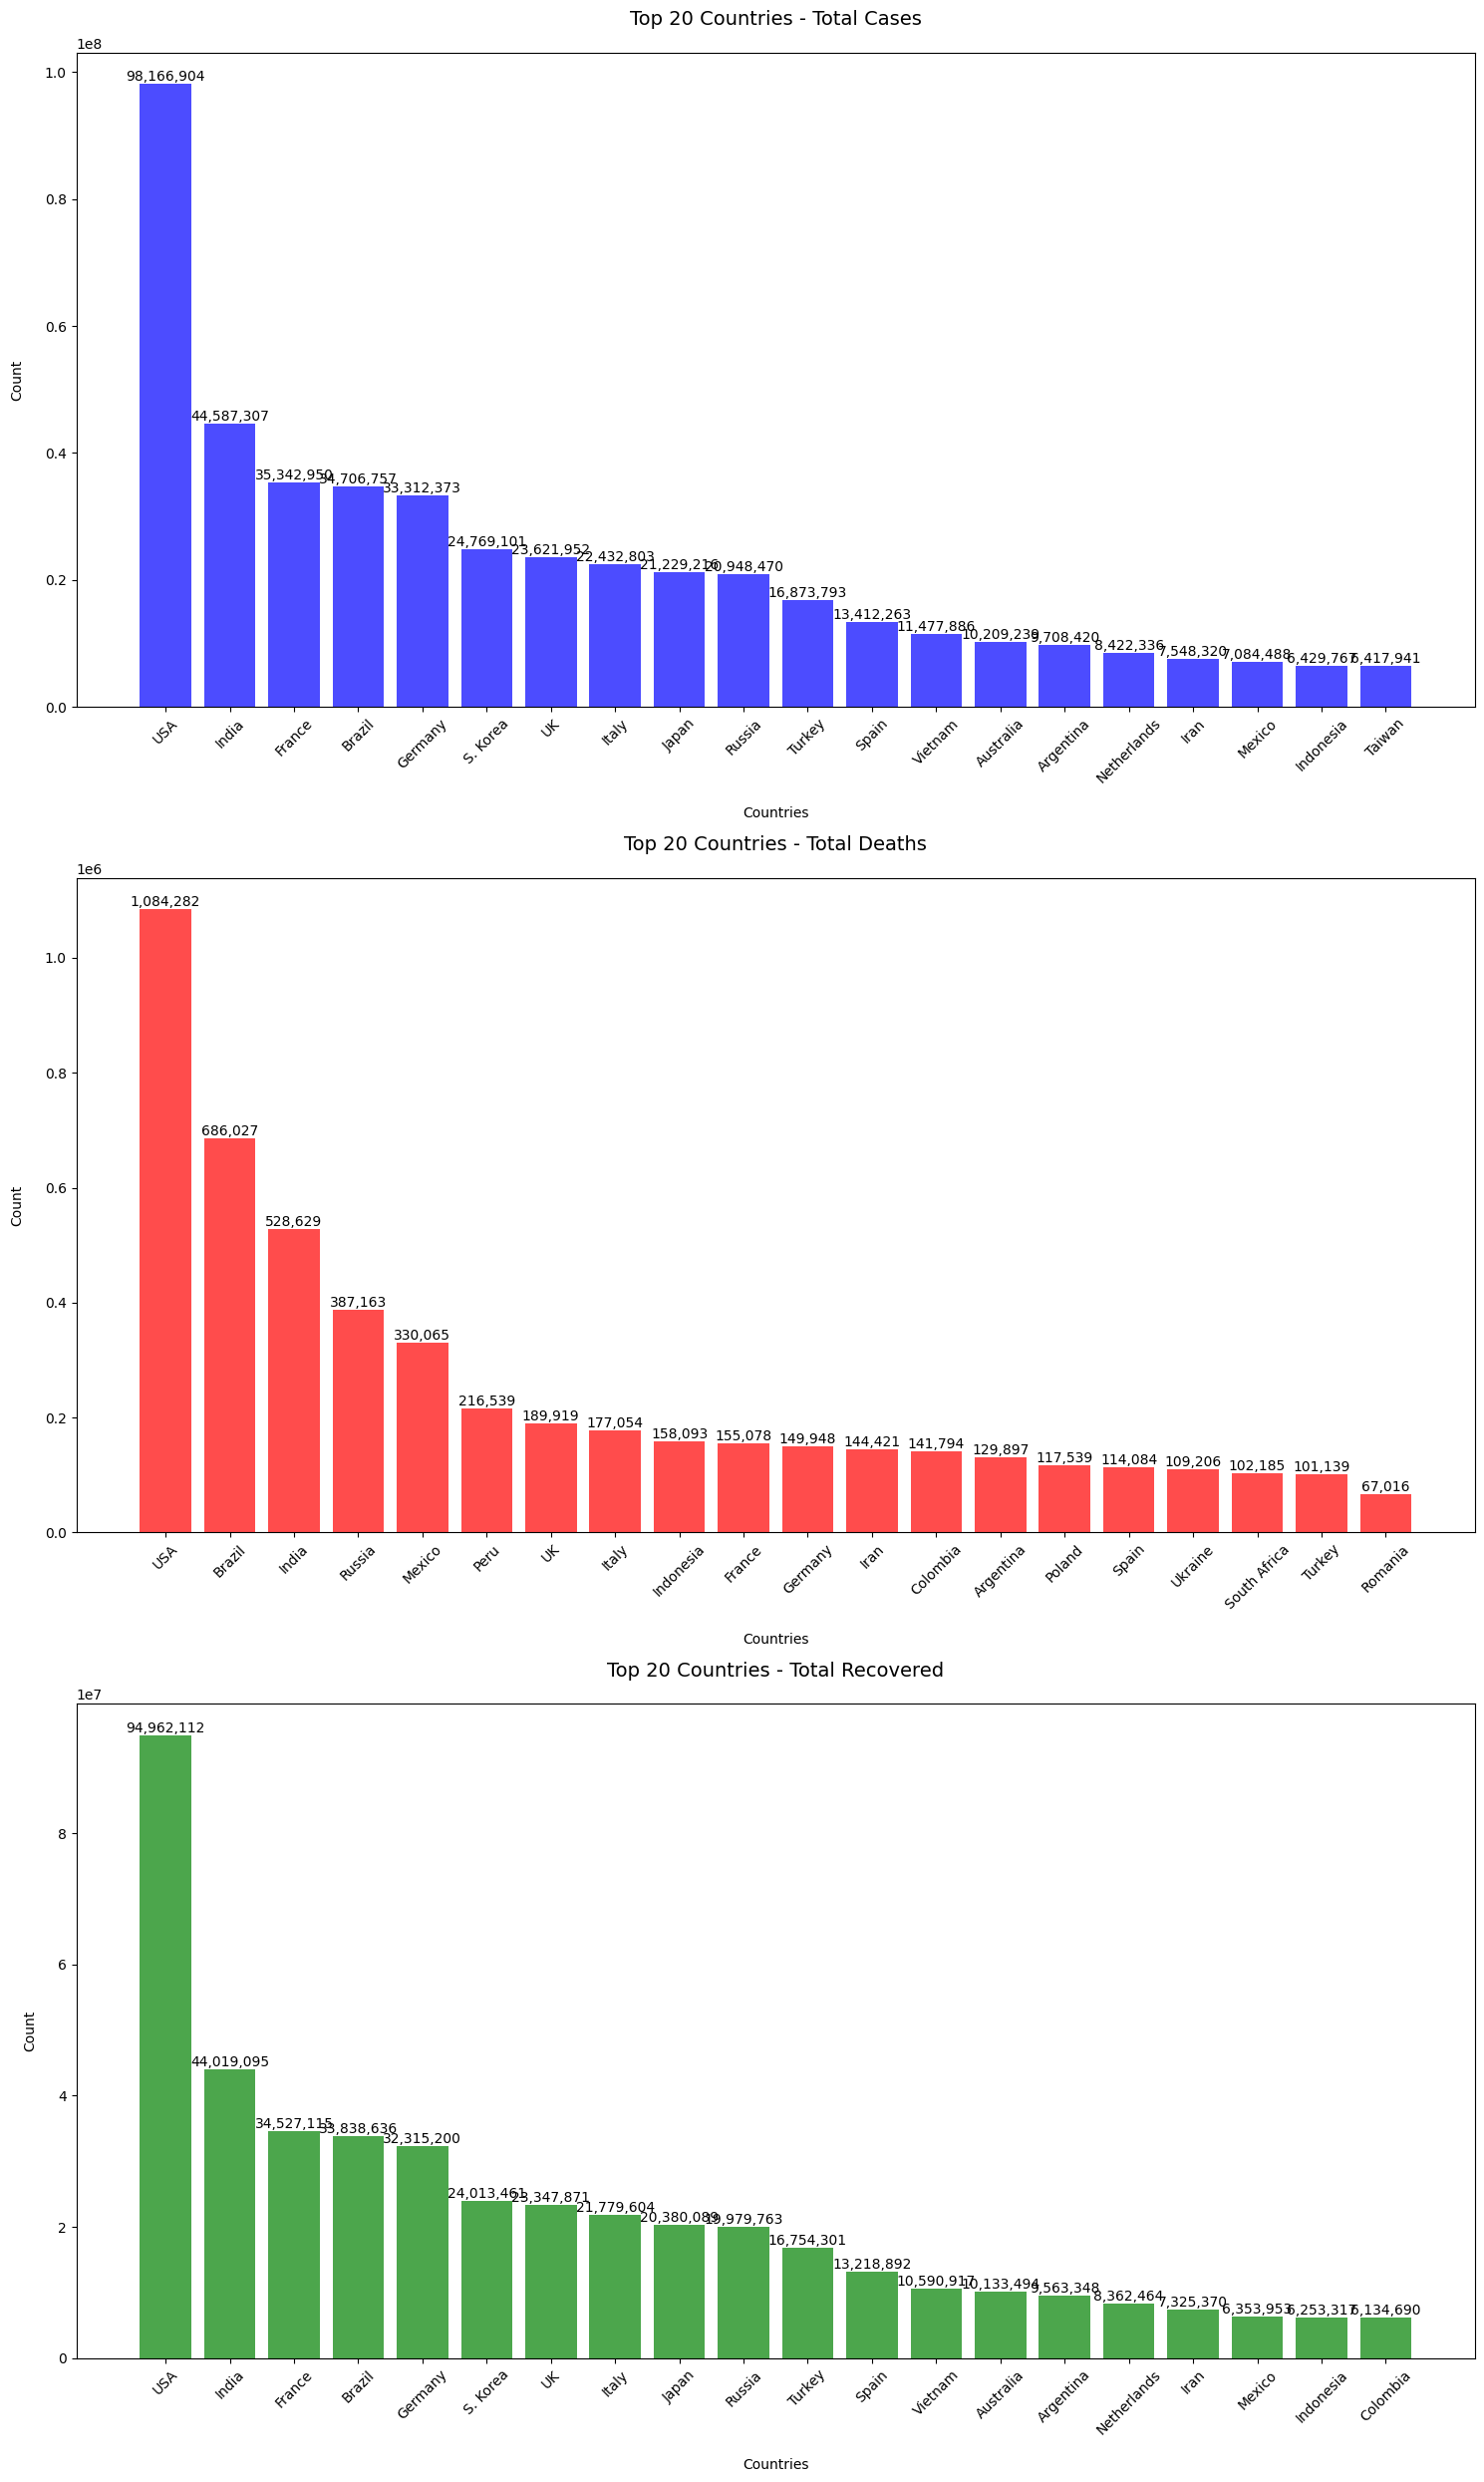

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 25))

# Function to plot top 20 countries for each metric
def plot_top_countries(ax, data, column, color, title):
    # Sort and get top 20
    top_20 = data.nlargest(20, column)
    
    # Create bar plot
    bars = ax.bar(top_20['Country, Other'], top_20[column], color=color, alpha=0.7)
    ax.set_title(title, pad=20, fontsize=14)
    ax.set_xlabel('Countries', labelpad=15)
    ax.set_ylabel('Count', labelpad=15)
    
    # Rotate the tick labels
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                horizontalalignment='center', 
                verticalalignment='bottom')

# Plot each metric
plot_top_countries(ax1, df, 'Total Cases', 'blue', 'Top 20 Countries - Total Cases')
plot_top_countries(ax2, df, 'Total Deaths', 'red', 'Top 20 Countries - Total Deaths')
plot_top_countries(ax3, df, 'Total Recovered', 'green', 'Top 20 Countries - Total Recovered')

# Add more space between subplots
plt.subplots_adjust(hspace=0.4)

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Load the cleaned data
df = pd.read_csv('covid_cleaned.csv')

# Define features (X) and target (y)
features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Population']
target = 'Active Cases'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
display(feature_importance.sort_values('importance', ascending=False))

Model Performance Metrics:
Mean Absolute Error: 45,823.66
Mean Squared Error: 13,459,371,909.63
Root Mean Squared Error: 116,014.53

Feature Importance:


,feature,importance
0,Total Cases,0.390982
2,Total Recovered,0.284660
1,Total Deaths,0.258832
3,Population,0.065526


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

Best Parameters:
bootstrap: True
max_depth: 16
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 14
n_estimators: 117

Best R² Score: 0.5861

Test Set Performance:
MAE: 41,140.64
RMSE: 127,510.01
R² Score: 0.2228


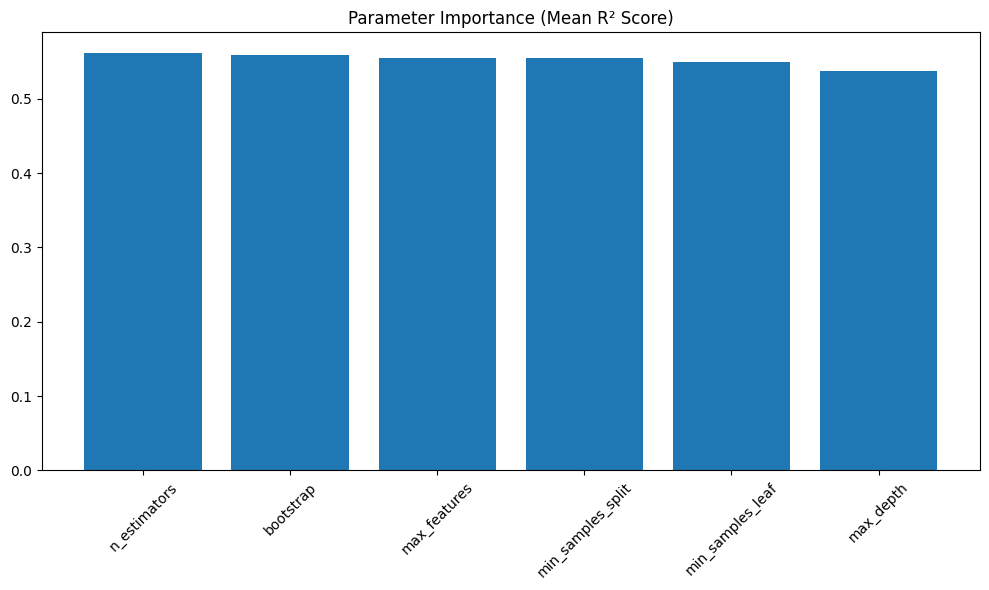


Feature Importance:


,feature,importance
0,Total Cases,0.367681
1,Total Deaths,0.290609
2,Total Recovered,0.281551
3,Population,0.060159


In [11]:
# Load and prepare data
df = pd.read_csv('covid_cleaned.csv')

features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Population']
target = 'Active Cases'

X = df[features].copy()
y = df[target].copy()

# Log transform features and target
for col in features:
    X[col] = np.log1p(X[col])
y = np.log1p(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter space for random search
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(range(5, 31)),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create and run random search
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=1000,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)

# Get results as DataFrame
results = pd.DataFrame(rf_random.cv_results_)

# Print best parameters and score
print("\nBest Parameters:")
for param, value in rf_random.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest R² Score: {rf_random.best_score_:.4f}")

# Test best model on test set
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Transform back to original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print("\nTest Set Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Plot parameter importance
param_importance = pd.DataFrame({
    'Parameter': results.params.iloc[0].keys(),
    'Mean R²': [results[results.params.apply(lambda x: x[param] == rf_random.best_params_[param])]['mean_test_score'].mean() 
                for param in rf_random.best_params_.keys()]
})
param_importance = param_importance.sort_values('Mean R²', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(param_importance['Parameter'], param_importance['Mean R²'])
plt.xticks(rotation=45)
plt.title('Parameter Importance (Mean R² Score)')
plt.tight_layout()
plt.show()

# Feature importance of best model
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_rf.feature_importances_
})
print("\nFeature Importance:")
display(feature_importance.sort_values('importance', ascending=False))

In [6]:
# Define an expanded set of features
features = [
    'Total Cases', 
    'Total Deaths', 
    'Total Recovered',
    'Population',
    'Serious, Critical',    # Indicates severity of current cases
    'Tot Cases/ 1M pop',    # Controls for population size
]
target = 'Active Cases'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=50,           # Reduced number of trees
    max_depth=10,              # Limit tree depth to prevent overfitting
    min_samples_split=5,       # Require more samples to split
    min_samples_leaf=2,        # Require at least 2 samples in leaf nodes
    max_features='sqrt',       # Use sqrt(n_features) for each split
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Use all processors
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
display(feature_importance.sort_values('importance', ascending=False))

Model Performance Metrics:
Mean Absolute Error: 42,951.35
Mean Squared Error: 15,460,533,981.75
Root Mean Squared Error: 124,340.40

Feature Importance:


,feature,importance
0,Total Cases,0.310848
2,Total Recovered,0.244361
4,"Serious, Critical",0.169186
1,Total Deaths,0.107917
3,Population,0.101972
5,Tot Cases/ 1M pop,0.065715


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

Best Parameters:
bootstrap: False
max_depth: 8
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 16
n_estimators: 197

Best R² Score: 0.5968

Test Set Performance:
MAE: 38,893.65
RMSE: 126,668.38
R² Score: 0.2330


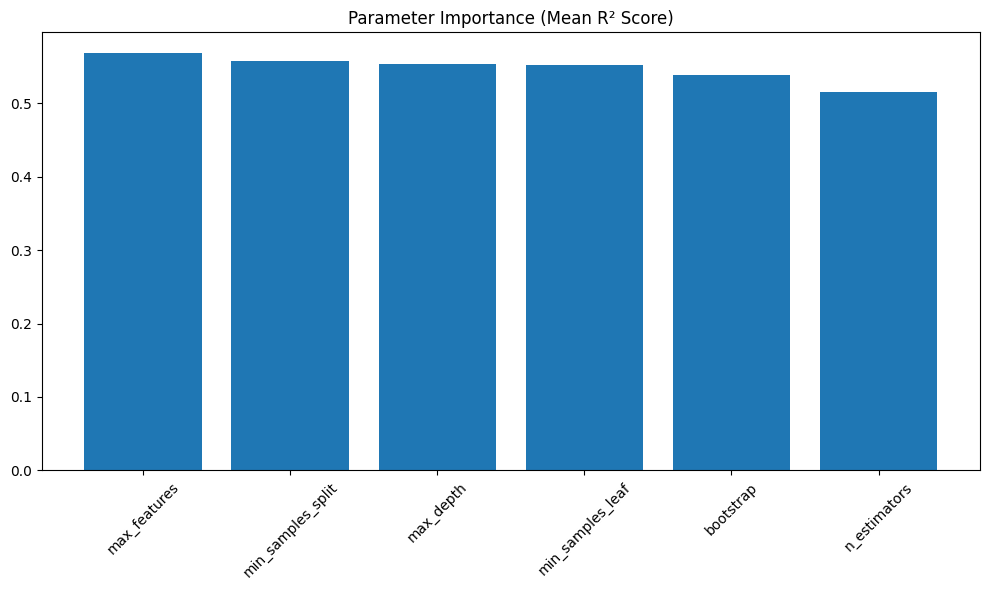


Feature Importance:


,feature,importance
0,Total Cases,0.338145
2,Total Recovered,0.221618
1,Total Deaths,0.219834
4,"Serious, Critical",0.089293
3,Population,0.072332
5,Tot Cases/ 1M pop,0.058778


In [13]:
# Load and prepare data
df = pd.read_csv('covid_cleaned.csv')

# Define an expanded set of features
features = [
    'Total Cases', 
    'Total Deaths', 
    'Total Recovered',
    'Population',
    'Serious, Critical',    # Indicates severity of current cases
    'Tot Cases/ 1M pop',    # Controls for population size
]
target = 'Active Cases'

X = df[features].copy()
y = df[target].copy()

# Log transform features and target
for col in features:
    X[col] = np.log1p(X[col])
y = np.log1p(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter space for random search
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(range(5, 31)),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create and run random search
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=1000,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)

# Get results as DataFrame
results = pd.DataFrame(rf_random.cv_results_)

# Print best parameters and score
print("\nBest Parameters:")
for param, value in rf_random.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest R² Score: {rf_random.best_score_:.4f}")

# Test best model on test set
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Transform back to original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print("\nTest Set Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Plot parameter importance
param_importance = pd.DataFrame({
    'Parameter': results.params.iloc[0].keys(),
    'Mean R²': [results[results.params.apply(lambda x: x[param] == rf_random.best_params_[param])]['mean_test_score'].mean() 
                for param in rf_random.best_params_.keys()]
})
param_importance = param_importance.sort_values('Mean R²', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(param_importance['Parameter'], param_importance['Mean R²'])
plt.xticks(rotation=45)
plt.title('Parameter Importance (Mean R² Score)')
plt.tight_layout()
plt.show()

# Feature importance of best model
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_rf.feature_importances_
})
print("\nFeature Importance:")
display(feature_importance.sort_values('importance', ascending=False))

In [22]:
# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert Series to numpy arrays before reshaping
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1)).ravel()


# Train new model on normalized data
rf_normalized = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
rf_random_normalized = RandomizedSearchCV(
    estimator=rf_normalized,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the model
rf_random_normalized.fit(X_train_normalized, y_train_normalized)

# Print best parameters
print("Best Parameters for Normalized Model:")
for param, value in rf_random_normalized.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest R² Score (Normalized): {rf_random_normalized.best_score_:.4f}")

# Test best model on normalized test set
best_rf_normalized = rf_random_normalized.best_estimator_
y_pred_normalized = best_rf_normalized.predict(X_test_normalized)

# Calculate metrics on normalized data
mae_normalized = mean_absolute_error(y_test_normalized, y_pred_normalized)
mse_normalized = mean_squared_error(y_test_normalized, y_pred_normalized)
rmse_normalized = np.sqrt(mse_normalized)
r2_normalized = r2_score(y_test_normalized, y_pred_normalized)

print("\nNormalized Test Set Performance:")
print(f"Normalized MAE: {mae_normalized:.4f}")
print(f"Normalized RMSE: {rmse_normalized:.4f}")
print(f"Normalized R² Score: {r2_normalized:.4f}")

# Feature importance of normalized model
feature_importance_normalized = pd.DataFrame({
    'feature': features,
    'importance': best_rf_normalized.feature_importances_
})
print("\nFeature Importance (Normalized Model):")
display(feature_importance_normalized.sort_values('importance', ascending=False))



Best Parameters for Normalized Model:
n_estimators: 100
min_samples_split: 10
min_samples_leaf: 2
max_depth: 30

Best R² Score (Normalized): 0.5824

Normalized Test Set Performance:
Normalized MAE: 0.4912
Normalized RMSE: 0.6219
Normalized R² Score: 0.5740

Feature Importance (Normalized Model):


,feature,importance
0,Total Cases,0.443827
1,Total Deaths,0.239301
2,Total Recovered,0.189799
5,Tot Cases/ 1M pop,0.063087
3,Population,0.042176
4,"Serious, Critical",0.021810
